# Support Vector Machine

In [1]:
!pip install -q kaggle

from google.colab import userdata
import os

os.environ['KAGGLE_KEY'] = "6bb9bede2c17aad6726603db6482869b"
os.environ['KAGGLE_USERNAME'] = "hafidzharridil"

!kaggle datasets download -d techsash/waste-classification-data
!unzip waste-classification-data.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.j

Image pre-procces\
resizing and remove corrupted data

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

test_directory = '/content/DATASET/TEST'
train_directory = '/content/DATASET/TRAIN'

# Function to resize images in a given directory
def resize_images(directory, output_size):
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img = img.resize(output_size, Image.ANTIALIAS)
                img.save(file_path)
                print(f"Resized {file_path}")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Define the output size
output_size = (128*4, 128*4)  # Change to desired size

# Resize images in train and test directories
resize_images(train_directory, output_size)
resize_images(test_directory, output_size)



<ipython-input-3-377a4326d156>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(output_size, Image.ANTIALIAS)


Output streaming akan dipotong hingga 5000 baris terakhir.
Resized /content/DATASET/TRAIN/O/O_5878.jpg
Resized /content/DATASET/TRAIN/O/O_3372.jpg
Resized /content/DATASET/TRAIN/O/O_1983.jpg
Resized /content/DATASET/TRAIN/O/O_7460.jpg
Resized /content/DATASET/TRAIN/O/O_6826.jpg
Resized /content/DATASET/TRAIN/O/O_10021.jpg
Resized /content/DATASET/TRAIN/O/O_1003.jpg
Resized /content/DATASET/TRAIN/O/O_5714.jpg
Resized /content/DATASET/TRAIN/O/O_10418.jpg
Resized /content/DATASET/TRAIN/O/O_10731.jpg
Resized /content/DATASET/TRAIN/O/O_852.jpg
Resized /content/DATASET/TRAIN/O/O_9628.jpg
Resized /content/DATASET/TRAIN/O/O_6870.jpg
Resized /content/DATASET/TRAIN/O/O_4477.jpg
Resized /content/DATASET/TRAIN/O/O_5181.jpg
Resized /content/DATASET/TRAIN/O/O_12251.jpg
Resized /content/DATASET/TRAIN/O/O_5248.jpg
Resized /content/DATASET/TRAIN/O/O_2183.jpg
Resized /content/DATASET/TRAIN/O/O_5407.jpg
Resized /content/DATASET/TRAIN/O/O_7578.jpg
Resized /content/DATASET/TRAIN/O/O_9617.jpg
Resized /conte

In [4]:
import os
from PIL import Image

# Function to remove images that cannot be identified
def remove_unidentifiable_images(directory):
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify that it is, in fact, an image
            except (IOError, SyntaxError) as e:
                print(f"Removing {file_path} due to error: {e}")
                os.remove(file_path)


# Remove unidentifiable images in train and test directories
remove_unidentifiable_images(train_directory)
remove_unidentifiable_images(test_directory)


Removing /content/DATASET/TRAIN/R/R_2201.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_2201.jpg'
Removing /content/DATASET/TRAIN/R/R_2280.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_2280.jpg'
Removing /content/DATASET/TRAIN/R/R_6489.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_6489.jpg'
Removing /content/DATASET/TRAIN/R/R_8464.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_8464.jpg'
Removing /content/DATASET/TRAIN/R/R_8224.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_8224.jpg'
Removing /content/DATASET/TRAIN/R/R_3792.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_3792.jpg'
Removing /content/DATASET/TRAIN/R/R_6700.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_6700.jpg'
Removing /content/DATASET/TRAIN/R/R_9563.jpg due to error: cannot identify image file '/content/DATASET/TRAIN/R/R_9563.jpg'
Removing

validation data after resizing

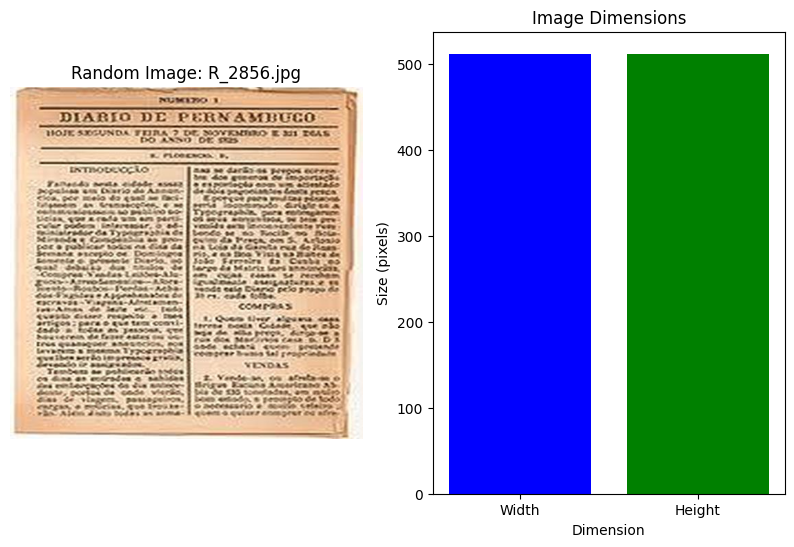

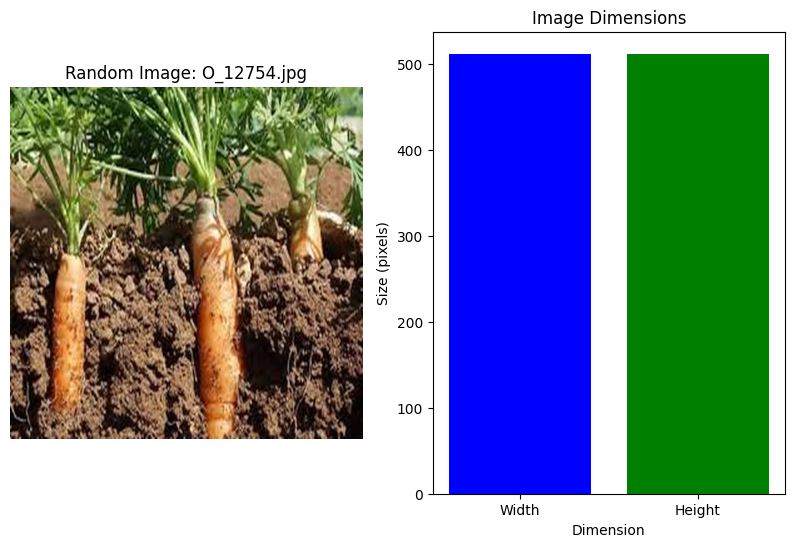

In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Function to show a random image from a directory and plot its size
def show_random_image_with_size(directory):
    # List all files in the directory and subdirectories
    image_files = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg')):
                image_files.append(os.path.join(subdir, file))

    # Choose a random image file
    random_image_path = random.choice(image_files)

    # Open the image
    img = Image.open(random_image_path)

    # Get image size
    width, height = img.size

    # Plot the image
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Random Image: {os.path.basename(random_image_path)}")

    # Plot the size as a bar chart
    plt.subplot(1, 2, 2)
    plt.bar(['Width', 'Height'], [width, height], color=['blue', 'green'])
    plt.xlabel('Dimension')
    plt.ylabel('Size (pixels)')
    plt.title('Image Dimensions')

    plt.show()

# Show a random image with its size from the train directory
show_random_image_with_size(train_directory)

# Show a random image with its size from the test directory
show_random_image_with_size(test_directory)


In [6]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

img2vec installation

In [7]:
pip install img2vec-pytorch

Ekstraksi dengan img2vec\
Pemisahan data train dan test\
Penyimpanan ekstraksi ke dalam kamus data

In [8]:
from  PIL import Image
import os
from img2vec_pytorch import Img2Vec

# prepare

img2vec = Img2Vec() # Create an instance of the Img2Vec class
data_dir = '/content/DATASET/'
train_data = os.path.join(data_dir, 'TRAIN')
test_data = os.path.join(data_dir, 'TEST')

data = {}

for j, dir_ in enumerate([train_data, test_data]):
  features = []
  labels  = []
  for category in os.listdir(dir_):
    for img_path in os.listdir(os.path.join(dir_, category)):
      img_path = os.path.join(dir_, category, img_path)
      try:
        img = Image.open(img_path).convert('RGB') # Convert image to RGB
        img_features = img2vec.get_vec(img) # Use the instance to call the method
        features.append(img_features)
        labels.append(category)
      except Exception as e:
        print(f"Error processing {img_path}: {e}") # Print the error message to help diagnose the issue

  data[['training_data', 'test_data'][j]] = features
  data[['training_labels', 'test_labels'][j]] = labels

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.8MB/s]


Train model svm dengan beberapa kernel\
Prediksi dan evaluasi model




In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data training dan labels diasumsikan sudah ada dalam data['training_data'] dan data['training_labels']

# Linear Kernel
model_linear = SVC(kernel='linear', C=1.0, gamma='scale')
model_linear.fit(data['training_data'], data['training_labels'])

# Polynomial Kernel
model_poly = SVC(kernel='poly', C=1.0, gamma='scale', degree=3)
model_poly.fit(data['training_data'], data['training_labels'])

# RBF Kernel (Default)
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_rbf.fit(data['training_data'], data['training_labels'])

# Sigmoid Kernel
model_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale')
model_sigmoid.fit(data['training_data'], data['training_labels'])

# Evaluate models
test_labels = np.array(data['test_labels'])  # Convert to numpy array
y_pred_linear = model_linear.predict(data['test_data'])
y_pred_poly = model_poly.predict(data['test_data'])
y_pred_rbf = model_rbf.predict(data['test_data'])
y_pred_sigmoid = model_sigmoid.predict(data['test_data'])

# Calculate accuracy
accuracy_linear = accuracy_score(test_labels, y_pred_linear)
accuracy_poly = accuracy_score(test_labels, y_pred_poly)
accuracy_rbf = accuracy_score(test_labels, y_pred_rbf)
accuracy_sigmoid = accuracy_score(test_labels, y_pred_sigmoid)

print(f"Accuracy (Linear Kernel): {accuracy_linear}")
print(f"Accuracy (Polynomial Kernel): {accuracy_poly}")
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
print(f"Accuracy (Sigmoid Kernel): {accuracy_sigmoid}")


Accuracy (Linear Kernel): 0.9024
Accuracy (Polynomial Kernel): 0.9092
Accuracy (RBF Kernel): 0.9168
Accuracy (Sigmoid Kernel): 0.8416


Report classification

In [14]:
from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred_linear = model_linear.predict(data['test_data'])

# Print classification report for Linear Kernel
print("Classification Report for Linear Kernel:")
print(classification_report(test_labels, y_pred_linear, target_names=['O', 'R']))


Classification Report for Linear Kernel:
              precision    recall  f1-score   support

           O       0.87      0.97      0.92      1399
           R       0.95      0.82      0.88      1101

    accuracy                           0.90      2500
   macro avg       0.91      0.89      0.90      2500
weighted avg       0.91      0.90      0.90      2500



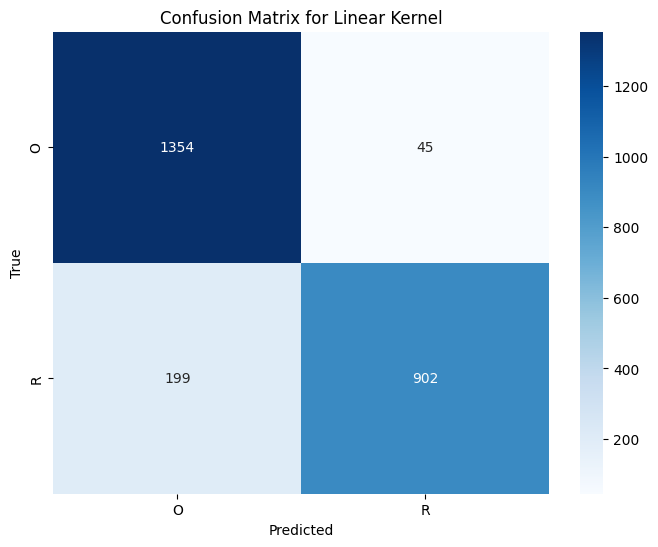

YY: 1354
YN: 45
NY: 199
NN: 902


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have data['test_labels'] and model_linear

# Predict the labels for the test data
y_pred_linear = model_linear.predict(data['test_data'])

# Compute the confusion matrix
cm_linear = confusion_matrix(test_labels, y_pred_linear)

# Define the custom labels for the confusion matrix
custom_labels = ['YY', 'YN', 'NY', 'NN']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['O', 'R'], yticklabels=['O', 'R'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Linear Kernel')
plt.show()

# Print the confusion matrix with custom labels
print(f"{custom_labels[0]}: {cm_linear[0, 0]}")
print(f"{custom_labels[1]}: {cm_linear[0, 1]}")
print(f"{custom_labels[2]}: {cm_linear[1, 0]}")
print(f"{custom_labels[3]}: {cm_linear[1, 1]}")


In [15]:
from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred_poly = model_poly.predict(data['test_data'])

# Print classification report for Polynomial Kernel
print("Classification Report for Polynomial Kernel:")
print(classification_report(test_labels, y_pred_poly, target_names=['O', 'R']))


Classification Report for Polynomial Kernel:
              precision    recall  f1-score   support

           O       0.87      0.98      0.92      1399
           R       0.97      0.82      0.89      1101

    accuracy                           0.91      2500
   macro avg       0.92      0.90      0.91      2500
weighted avg       0.92      0.91      0.91      2500



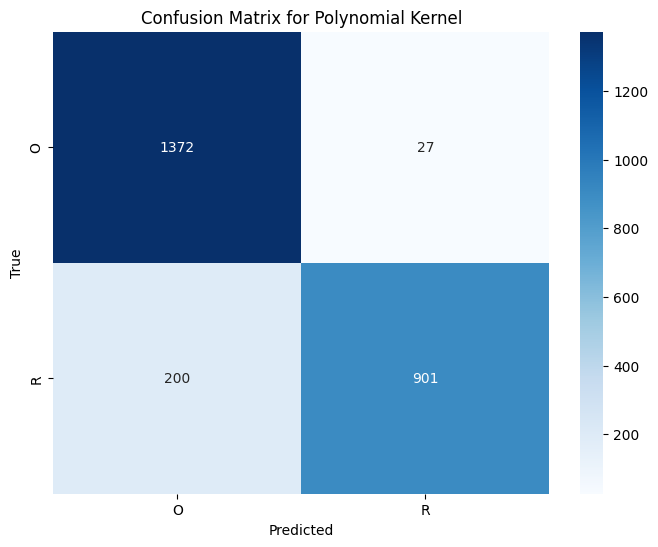

YY: 1372
YN: 27
NY: 200
NN: 901


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have data['test_labels'] and model_poly

# Predict the labels for the test data
y_pred_poly = model_poly.predict(data['test_data'])

# Compute the confusion matrix
cm_poly = confusion_matrix(test_labels, y_pred_poly)

# Define the custom labels for the confusion matrix
custom_labels = ['YY', 'YN', 'NY', 'NN']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['O', 'R'], yticklabels=['O', 'R'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Polynomial Kernel')
plt.show()

# Print the confusion matrix with custom labels
print(f"{custom_labels[0]}: {cm_poly[0, 0]}")
print(f"{custom_labels[1]}: {cm_poly[0, 1]}")
print(f"{custom_labels[2]}: {cm_poly[1, 0]}")
print(f"{custom_labels[3]}: {cm_poly[1, 1]}")


In [16]:
from sklearn.metrics import classification_report

# Predict the labels for the test data
y_pred_rbf = model_rbf.predict(data['test_data'])

# Print classification report for RBF Kernel
print("Classification Report for RBF Kernel:")
print(classification_report(test_labels, y_pred_rbf, target_names=['O', 'R']))


Classification Report for RBF Kernel:
              precision    recall  f1-score   support

           O       0.88      0.98      0.93      1399
           R       0.97      0.83      0.90      1101

    accuracy                           0.92      2500
   macro avg       0.93      0.91      0.91      2500
weighted avg       0.92      0.92      0.92      2500



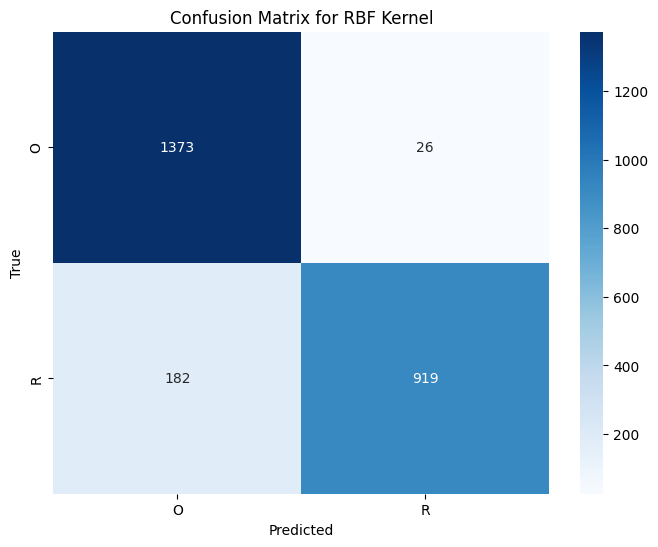

YY: 1373
YN: 26
NY: 182
NN: 919


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have data['test_labels'] and model_rbf

# Predict the labels for the test data
y_pred_rbf = model_rbf.predict(data['test_data'])

# Compute the confusion matrix
cm_rbf = confusion_matrix(test_labels, y_pred_rbf)

# Define the custom labels for the confusion matrix
custom_labels = ['YY', 'YN', 'NY', 'NN']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['O', 'R'], yticklabels=['O', 'R'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RBF Kernel')
plt.show()

# Print the confusion matrix with custom labels
print(f"{custom_labels[0]}: {cm_rbf[0, 0]}")
print(f"{custom_labels[1]}: {cm_rbf[0, 1]}")
print(f"{custom_labels[2]}: {cm_rbf[1, 0]}")
print(f"{custom_labels[3]}: {cm_rbf[1, 1]}")


Save model\
Tes model terhadap input image

In [55]:
import pickle
# Save RBF Kernel model
with open('/rbfmodel.p', 'wb') as f:
    pickle.dump(model_rbf, f)
    f.close()

with open('/linearmodel.p', 'wb') as f:
    pickle.dump(model_linear, f)
    f.close()

with open('/polymodel.p',
          'wb') as f:
    pickle.dump(model_poly, f)
    f.close()


Predicted Label: R


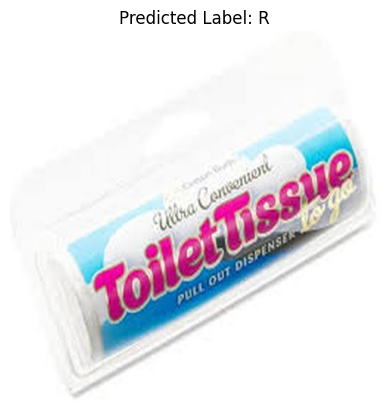

In [67]:
from PIL import Image
import os
from img2vec_pytorch import Img2Vec
import pickle
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for displaying images

# Load the saved model
with open('/rbfmodel.p', 'rb') as f:
    model_rbf = pickle.load(f)

# Initialize Img2Vec
img2vec = Img2Vec()

# Path to the image
image_path = '/content/DATASET/TEST/R/R_11012.jpg'

# Load the image
img = Image.open(image_path)

# Get the image features
features = img2vec.get_vec(img)

# Reshape features to a 2D array with a single sample
features = features.reshape(1, -1)

# Predict using the model
pred = model_rbf.predict(features)

# Print the prediction
print(f'Predicted Label: {pred[0]}')

# Display the image
plt.imshow(img)
plt.title(f'Predicted Label: {pred[0]}')
plt.axis('off') # Hide the axes
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted Label: R


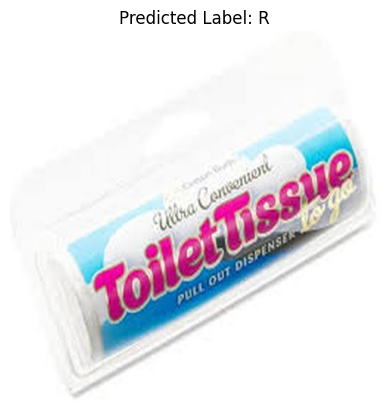

In [68]:
from PIL import Image
import os
from img2vec_pytorch import Img2Vec
import pickle
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for displaying images

# Load the saved model
with open('/linearmodel.p', 'rb') as f:
    model_rbf = pickle.load(f)

# Initialize Img2Vec
img2vec = Img2Vec()

# Path to the image
image_path = '/content/DATASET/TEST/R/R_11012.jpg'

# Load the image
img = Image.open(image_path)

# Get the image features
features = img2vec.get_vec(img)

# Reshape features to a 2D array with a single sample
features = features.reshape(1, -1)

# Predict using the model
pred = model_rbf.predict(features)

# Print the prediction
print(f'Predicted Label: {pred[0]}')

# Display the image
plt.imshow(img)
plt.title(f'Predicted Label: {pred[0]}')
plt.axis('off') # Hide the axes
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted Label: R


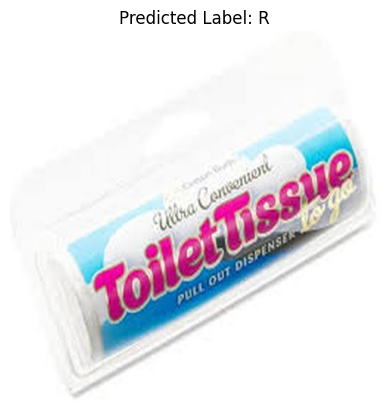

In [69]:
from PIL import Image
import os
from img2vec_pytorch import Img2Vec
import pickle
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for displaying images

# Load the saved model
with open('/polymodel.p', 'rb') as f:
    model_rbf = pickle.load(f)

# Initialize Img2Vec
img2vec = Img2Vec()

# Path to the image
image_path = '/content/DATASET/TEST/R/R_11012.jpg'

# Load the image
img = Image.open(image_path)

# Get the image features
features = img2vec.get_vec(img)

# Reshape features to a 2D array with a single sample
features = features.reshape(1, -1)

# Predict using the model
pred = model_rbf.predict(features)

# Print the prediction
print(f'Predicted Label: {pred[0]}')

# Display the image
plt.imshow(img)
plt.title(f'Predicted Label: {pred[0]}')
plt.axis('off') # Hide the axes
plt.show()
